In [1]:
from utility_functions import *
from Multi_Layered_Perceptron import *
%matplotlib inline

  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

Preprocessing the MNIST Data...
Normalizing the MNIST Data...
Creating the architecture for Neural Network...
Training the Neural Network...


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [08:25<00:00, 33.68s/it]


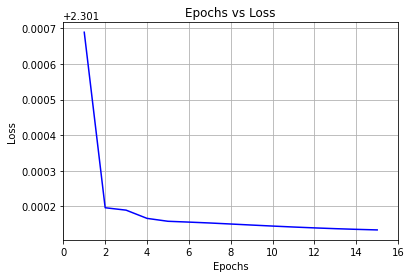

Performance Evaluation
Training accuracy 	: 0.1124
Testing accuracy 	: 0.1135


In [93]:
# Benchmarking the perfromance of our MLP on MNIST dataset.
print('Preprocessing the MNIST Data...')
df_train, X_train, Y_train = preprocess_data_mnist('mnist_train.csv')
df_test, X_test, Y_test = preprocess_data_mnist('mnist_test.csv')
print('Normalizing the MNIST Data...')
X_train, train_means, train_stds = normalize_train_data(X_train)
X_test = normalize_test_data(X_test, train_means, train_stds)

    
# create a Multilayer Perceptron with default parameters
print('Creating the architecture for Neural Network...')
inputs = 784; layers = [512, 128, 16]; output = 10
mlp = Multi_Layered_Perceptron(n_inputs=inputs, hidden_layers=layers, n_outputs=output, activation_function='sigmoid')

# training the network
print('Training the Neural Network...')
mlp.BatchSGD(X_train.values, Y_train.values, learning_rate=0.0001, epochs=15, batchsize=1000)
mlp.plot_loss()

# Evaluate Performance
print("Performance Evaluation")
y_pred_train_classes = mlp.predict(X_train.values)
y_pred_test_classes = mlp.predict(X_test.values)
print('Training accuracy \t:',  round(accuracy(Y_train.values, y_pred_train_classes), 4))
print('Testing accuracy \t:', round(accuracy(Y_test.values, y_pred_test_classes), 4))